# Simpsons Paradox

http://causality.cs.ucla.edu/blog/index.php/2020/07/06/race-covid-mortality-and-simpsons-paradox-by-dana-mackenzie/

For overall Ethnicity
https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationcharacteristicsresearchtables

Where is this 14% stat coming from?

In [21]:
import sys
sys.path.insert(0, '../src/data')
import bame_datastore
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [244]:
url = "https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fcountsandratiosofcoronavirusrelateddeathsbyethnicgroupenglandandwales%2f2march2020to10april2020/reft1countsratiocovidsexageeth06052020185223.xlsx"
r = requests.get(url)
fpath = f"../data/external/deaths_ethnicities.xlsx"
with open(fpath, 'wb') as outfile:
    outfile.write(r.content)
df = pd.read_excel(fpath, sheet_name="Table 1", skiprows=2, usecols=[0,1,2,3], nrows= 28)
df = df.set_index(["Ethnicity", "Ageband"]).groupby(by = ["Ethnicity", "Ageband"]).sum()
df

Counts of Coronavirus-related deaths
Ethnicity                    Ageband                                      
Bangladeshis/Pakistani       0-64                                      100
                             65+                                       286
Black                        0-64                                      185
                             65+                                       581
Chinese                      0-64                                       10
                             65+                                        49
Indian                       0-64                                       82
                             65+                                       401
Mixed/Multiple Ethnic Groups 0-64                                       18
                             65+                                        76
Other Ethnic Group           0-64                                       65
                             65+                                       226
White                        0-64                                     1036
                             65+                                      9690

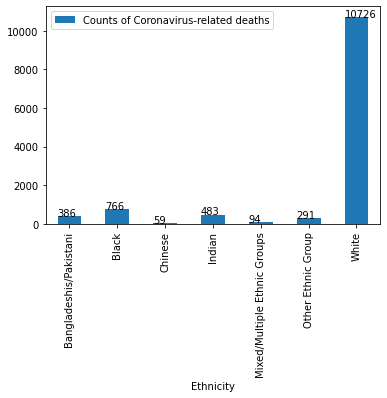

In [234]:
ax = df.groupby(by = ["Ethnicity"]).sum().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))




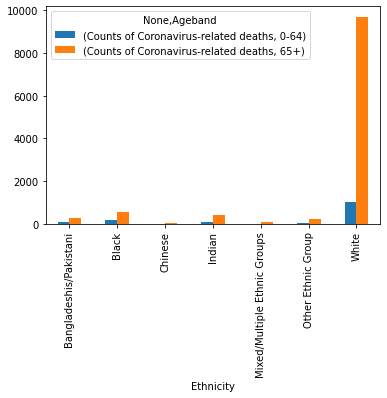

In [235]:
df_alt = df.groupby(by = ["Ethnicity", "Ageband"]).sum().reset_index()
df_alt = df_alt.pivot(index = "Ethnicity", columns="Ageband")
df_alt.plot.bar()


In [236]:
df_alt["total"] = df_alt[df_alt.columns[0]] + df_alt[df_alt.columns[1]]
df_alt[df_alt.columns[0]] = (df_alt[df_alt.columns[0]]/df_alt["total"])*100
df_alt[df_alt.columns[1]] = (df_alt[df_alt.columns[1]]/df_alt["total"])*100
df_alt

Counts of Coronavirus-related deaths             \
Ageband                                                      0-64        65+   
Ethnicity                                                                      
Bangladeshis/Pakistani                                  25.906736  74.093264   
Black                                                   24.151436  75.848564   
Chinese                                                 16.949153  83.050847   
Indian                                                  16.977226  83.022774   
Mixed/Multiple Ethnic Groups                            19.148936  80.851064   
Other Ethnic Group                                      22.336770  77.663230   
White                                                    9.658773  90.341227   

                              total  
Ageband                              
Ethnicity                            
Bangladeshis/Pakistani          386  
Black                           766  
Chinese                          59  
Indian                          483  
Mixed/Multiple Ethnic Groups     94  
Other Ethnic Group              291  
White                         10726

In [241]:
df_alt_sum = df.groupby(by = ["Ethnicity", "Ageband"]).sum().reset_index()
df_alt_sum = df_alt_sum.pivot(index = "Ethnicity", columns="Ageband").reset_index()
df_alt_sum["dummy"] = np.where(df_alt_sum['Ethnicity']=='White', "White", "Other")
df_alt_sum = df_alt_sum.groupby("dummy").sum()
df_alt_sum
df_alt_sum["total"] = df_alt_sum[df_alt_sum.columns[0]] + df_alt_sum[df_alt_sum.columns[1]]
df_alt_sum[df_alt_sum.columns[0]] = (df_alt_sum[df_alt_sum.columns[0]]/df_alt_sum["total"])*100
df_alt_sum[df_alt_sum.columns[1]] = (df_alt_sum[df_alt_sum.columns[1]]/df_alt_sum["total"])*100
df_alt_sum

/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Counts of Coronavirus-related deaths             total
Ageband                                 0-64        65+       
dummy                                                         
Other                              22.126022  77.873978   2079
White                               9.658773  90.341227  10726

In [242]:
2079/(10726+2079)

0.16235845372901211

# Population Estimates

In [70]:
bame_datastore.lib

{'mortality': ['fbook_covid_data',
  'bame_rpt_deaths',
  'bame_rpt_excess_deaths',
  'ons_deaths'],
 'explanatory': ['ethnicity_data',
  'bame_rpt_cases',
  'furlough_data',
  'key_workers',
  'deprivation',
  'pop_est'],
 'other': ['lad_geog']}

In [99]:
pop_df = bame_datastore.pop_est.df
gdf = bame_datastore.lad_geog.gdf.set_index("lad09nm")
pop_gdf = gdf.join(pop_df).dropna(thresh=2)
for col in pop_gdf.columns[9:]:
    pop_gdf[col] = (pop_gdf[col]/pop_gdf["All ages"])*100
pop_gdf

,objectid,lad09cd,lad09nmw,st_areashape,st_lengthshape,geometry,Code,Geography1,All ages,0,...,81,82,83,84,85,86,87,88,89,90+
lad09nm,,,,,,,,,,,,,,,,,,,,,
City of London,1,00AA,,3.143399e+06,7743.569362,"POLYGON ((-0.08519 51.52034, -0.09676 51.52332...",E09000001,London Borough,9721.0,0.771526,...,0.504063,0.432054,0.246888,0.390906,0.154305,0.349758,0.164592,0.257175,0.154305,1.213867
Barking and Dagenham,2,00AB,,3.584012e+07,32834.831127,"POLYGON ((0.15916 51.51203, 0.16548 51.52843, ...",E09000002,London Borough,212906.0,1.689478,...,0.302481,0.252694,0.227330,0.229209,0.184119,0.177543,0.159225,0.145134,0.140438,0.565038
Barnet,3,00AC,,8.696348e+07,44996.554865,"POLYGON ((-0.18209 51.66860, -0.19101 51.66395...",E09000003,London Borough,395869.0,1.238794,...,0.425898,0.373861,0.390533,0.359462,0.323592,0.314245,0.256398,0.238210,0.218507,0.917980
Bexley,4,00AD,,6.065689e+07,42833.280659,"MULTIPOLYGON (((0.18660 51.48044, 0.17520 51.4...",E09000004,London Borough,248287.0,1.206265,...,0.549767,0.504255,0.462771,0.432161,0.390677,0.365303,0.295626,0.291195,0.256155,1.020593
Brent,5,00AE,,4.378373e+07,35339.011384,"POLYGON ((-0.21348 51.55519, -0.23342 51.57198...",E09000005,London Borough,329771.0,1.434025,...,0.359340,0.364192,0.329623,0.310215,0.262606,0.239863,0.206507,0.189829,0.154046,0.619521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malvern Hills,376,47UC,,5.780682e+08,203902.376860,"POLYGON ((-2.26642 52.32361, -2.27389 52.32893...",E07000235,Non-metropolitan District,78698.0,0.720476,...,0.809423,0.815777,0.720476,0.701416,0.584513,0.548934,0.541310,0.438385,0.383745,1.584538
Redditch,377,47UD,,5.445971e+07,35830.293584,"POLYGON ((-1.88093 52.31093, -1.89187 52.32143...",E07000236,Non-metropolitan District,85261.0,1.158795,...,0.425752,0.477358,0.377664,0.309637,0.309637,0.238092,0.260377,0.250994,0.182968,0.758846
Worcester,378,47UE,,3.334386e+07,27203.704284,"POLYGON ((-2.20337 52.16732, -2.18726 52.17198...",E07000237,Non-metropolitan District,101222.0,1.122286,...,0.519650,0.525577,0.428761,0.390231,0.373437,0.333920,0.327004,0.275632,0.228211,0.801209


In [143]:
pop_df = bame_datastore.pop_est.df.copy() # import 2020 population estimates
cols_to_sum = pop_df.columns[68:] # gather 65+ columns
pop_df['total_65+'] = pop_df[cols_to_sum].sum(axis=1)  # create 65+ column
pop_df["pct_65+"] = pop_df["total_65+"]/ pop_df["All ages"]
pop_df

,Code,Geography1,All ages,0,1,2,3,4,5,6,...,83,84,85,86,87,88,89,90+,total_65+,pct_65+
Name,,,,,,,,,,,,,,,,,,,,,
UNITED KINGDOM,K02000001,Country,66796807.0,722881.0,752554.0,777309.0,802334.0,802185.0,809152.0,827149.0,...,316201.0,288806.0,255542.0,230667.0,210077.0,186163.0,159641.0,605181.0,12374961.0,0.185263
GREAT BRITAIN,K03000001,Country,64903140.0,700160.0,729146.0,753103.0,777260.0,777225.0,784154.0,801776.0,...,308434.0,281696.0,249323.0,224878.0,205072.0,181788.0,156024.0,591447.0,12060237.0,0.185819
ENGLAND AND WALES,K04000001,Country,59439840.0,649388.0,676412.0,698837.0,720721.0,719821.0,726317.0,742744.0,...,282197.0,257792.0,228197.0,206177.0,188071.0,167219.0,143992.0,547789.0,11016092.0,0.185332
ENGLAND,E92000001,Country,56286961.0,618858.0,644056.0,665596.0,686135.0,684992.0,691122.0,706742.0,...,265631.0,242740.0,214727.0,194007.0,177399.0,157770.0,135875.0,517273.0,10353716.0,0.183945
NORTH EAST,E12000001,Region,2669941.0,26621.0,27612.0,28621.0,29575.0,29315.0,30224.0,30960.0,...,13345.0,12509.0,10851.0,9793.0,8725.0,7825.0,6511.0,22608.0,532008.0,0.199258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fermanagh and Omagh,N09000006,Local Government District,117397.0,1422.0,1565.0,1561.0,1618.0,1565.0,1564.0,1581.0,...,469.0,410.0,398.0,342.0,307.0,285.0,232.0,880.0,20050.0,0.170788
Lisburn and Castlereagh,N09000007,Local Government District,146002.0,1781.0,1863.0,1804.0,1778.0,1867.0,1847.0,1894.0,...,707.0,610.0,515.0,508.0,442.0,364.0,302.0,1077.0,25439.0,0.174237
Mid and East Antrim,N09000008,Local Government District,139274.0,1442.0,1558.0,1636.0,1622.0,1657.0,1653.0,1686.0,...,657.0,652.0,552.0,469.0,413.0,380.0,302.0,1140.0,26526.0,0.190459


# Alt Ethnicity Data

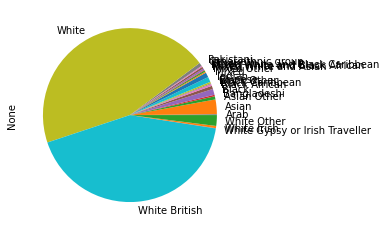

In [44]:
ethnic_df = bame_datastore.ethnicity_data.df
ethnic_df.drop(columns=["Geography_name", "Denominator"]).sum().plot.pie()